In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, f1_score, recall_score, precision_score, accuracy_score, auc, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV
import seaborn as sn

# to import script
import sys
sys.path.insert(1,"../")
from scripts import neuralnetwork as nn
nn.load_data_normalized(nn.PATH_TO_FASHION_TRAIN)

X_train, y_train, _ = nn.load_data_normalized(nn.PATH_TO_FASHION_TRAIN)
X_test, y_test, y = nn.load_data_normalized(nn.PATH_TO_FASHION_TEST)


pca = PCA(n_components = .90)
X_train_reduced = pca.fit_transform(X_train)

X_test_reduced = pca.transform(X_test)

X_train_reduced.shape

(10000, 62)

In [2]:
learning_rates = 0.001
epoch = 200
batch_sizes = [32, 64]


In [3]:
# initialize network
if False:
    for batch_size in batch_sizes:
        # 0 hidden layers 
        print("0 hidden layers")
        NN = nn.NeuralNetwork(X_train_reduced, y_train, batch_size=batch_size, epochs=epoch, lr=0.001) 
        # create network
        NN.add_layer(NN.input.shape[1], 5, NN.softmax)   
        # train and plotting
        NN.train()
        # NN.plot()
        # testing
        pred = NN.test(X_test_reduced,y_test)
        # 1 hidden layer
        print("1 hidden layer")
        NN = nn.NeuralNetwork(X_train_reduced, y_train, batch_size=batch_size, epochs=epoch, lr=0.001) 
        # create network
        NN.add_layer(NN.input.shape[1], 128, NN.leaky_ReLU)   
        NN.add_layer(128,5, NN.softmax)   
        # train and plotting
        NN.train()
        # NN.plot()
        # testing
        pred = NN.test(X_test_reduced,y_test)
        print("2 hidden layers")
        NN = nn.NeuralNetwork(X_train_reduced, y_train, batch_size=batch_size, epochs=epoch, lr=0.001) 
        # create network
        NN.add_layer(NN.input.shape[1], 256, NN.leaky_ReLU)   
        NN.add_layer(256, 128, NN.leaky_ReLU)   
        NN.add_layer(128,5, NN.softmax)   
        # train and plotting
        NN.train()
        # NN.plot()
        # testing
        pred = NN.test(X_test_reduced,y_test)

In [4]:
# best model 
batch_size = 32 
NN = nn.NeuralNetwork(X_train_reduced, y_train, batch_size=batch_size, epochs=epoch, lr=0.001) 
# create network
NN.add_layer(NN.input.shape[1], 128, NN.leaky_ReLU)   
NN.add_layer(128,5, NN.softmax)   
# train and plotting
NN.train()
# NN.plot()
# testing
pred = NN.test(X_test_reduced,y_test)

Model(lr=0.001,epochs=200) : ecpch 0 acc:51.81290064102564
Model(lr=0.001,epochs=200) : ecpch 50 acc:83.29326923076923
Model(lr=0.001,epochs=200) : ecpch 100 acc:84.81570512820512
Model(lr=0.001,epochs=200) : ecpch 150 acc:85.64703525641026
Accuracy: 84.28 %
[1 0 3 ... 2 4 4]


In [5]:
confusion_matrix_ = confusion_matrix(y_true=y, y_pred=pred)

Text(42.25, 0.5, 'Predicted labels')

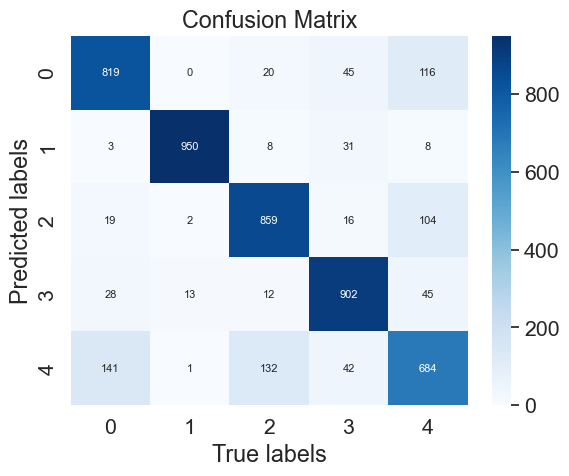

In [6]:
labels_text = ["Tshit/top","Trouses","Pullover","Dress","Shirt"]
sn.set(font_scale=1.4)
sn.heatmap(confusion_matrix_, cmap="Blues", annot=True, annot_kws={"size":8}, fmt="g" )
plt.title("Confusion Matrix")
plt.xlabel("True labels")
plt.ylabel("Predicted labels")


In [7]:
labels = np.unique(y)

In [8]:
pred

array([1, 0, 3, ..., 2, 4, 4], dtype=int64)

In [9]:
f1 = f1_score(y_true=y, y_pred=pred, average="macro")
accu = accuracy_score(y_true=y, y_pred=pred)
precision = precision_score(y_true=y, y_pred=pred, average="macro")
recall = recall_score(y_true=y, y_pred=pred, average="macro")

In [10]:
f1

0.842464720546257

In [11]:
accu

0.8428

In [12]:
precision

0.8425779066139285

In [13]:
recall

0.8428000000000001

In [14]:
## biarize
y_bin = label_binarize(y, classes=labels)
pred_bin = label_binarize(pred, classes=labels)
y_bin

array([[0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0],
       ...,
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0]])

In [15]:
roc_auc_score(y_true=y_bin, y_score=pred_bin, multi_class="ovo")

0.90175